## Example workflow for Spectra class

In [1]:
from spectra import Spectra
import pandas as pd
from typing import List, Tuple, Union
import numpy as np

### Load a .csv file containing spectra and preprocess

In [2]:
# Path to your .csv file
PATH = "/Users/davidl./Biophotonics/Data/45minus.csv"

# Read in as a pandas dataframe
df = pd.read_csv(PATH)

df

,water,Unnamed: 1,glucose,Unnamed: 3,plus_45_glucose,Unnamed: 5,plus_45_water,Unnamed: 7,Unnamed: 8
0,Wavelength (nm),%T,Wavelength (nm),%T,Wavelength (nm),%T,Wavelength (nm),%T,NaN
1,2500,15.36761475,2500,24.49520683,2500,21.25486374,2500,14.46792793,NaN
2,2498,15.65189934,2498,24.63697624,2498,21.46965981,2498,14.73953152,NaN
3,2496,15.95180321,2496,24.99483299,2496,21.6887188,2496,15.11364555,NaN
4,2494,16.13933945,2494,25.07463074,2494,21.78258896,2494,15.24424076,NaN
...,...,...,...,...,...,...,...,...,...
897,708,99.82275391,708,94.48414612,708,69.9415741,708,74.13309479,NaN
898,706,99.8578186,706,94.5070343,706,69.90323639,706,74.09104156,NaN
899,704,99.78069305,704,94.46611023,704,69.73740387,704,73.9026947,NaN
900,702,99.82162476,702,94.45469666,702,69.6943512,702,73.86715698,NaN


In [3]:
# Clean the data from NaN values
#df = df.drop(['Unnamed: 8'], axis=1)
df

# Order the wavelengths from short to long.
wavelengths = df['water'][1:][::-1].values.astype(float)
print(type(wavelengths), wavelengths.size)

# Define the spectra present in the dataset
water = df['Unnamed: 1'][1:][::-1].values.astype(float)
print(type(water), water.size)
glucose_solution = df['Unnamed: 3'][1:][::-1].values.astype(float)
plus_45_glucose = df['Unnamed: 5'][1:][::-1].values.astype(float)
plus_45_water = df['Unnamed: 7'][1:][::-1].values.astype(float)

<class 'numpy.ndarray'> 901
<class 'numpy.ndarray'> 901


### Create an instance of Spectra class

In [4]:
spectra = Spectra(water_ratio=0.99375,
                  solution_ratio=0.00625,
                  path_length=0.02,
                  concentration=4.16)
spectraPlus45 = Spectra(water_ratio=0.99375,
                  solution_ratio=0.00625,
                  path_length=0.02,
                  concentration=4.16)


# Load preprocessed spectra and wavelengths into the class instance
spectra.load_spectrum('Water', wavelengths, water)
spectra.load_spectrum('Glucose Solution', wavelengths, glucose_solution)
spectraPlus45.load_spectrum('Plus 45 Glucose', wavelengths, plus_45_glucose)
spectraPlus45.load_spectrum('Plus 45 Water', wavelengths, plus_45_water)

spectra.filter_data()
spectraPlus45.filter_data()

### Access the loaded Spectra

In [5]:
spectra_names = spectraPlus45.get_spectra_names()
print("Loaded spectra names:", spectra_names)

# Access a specific spectrum
#YOU NEED TO BE VERY SPECIFIC ABOUT WHAT SPECTRA YOU ARE USING
spectrum_name = "Plus 45 Glucose" # FOR WHICH SPECTRA?? NAME IT!
spectrum_fortyFive_info = spectraPlus45.get_spectrum(spectrum_name)
print(f"Spectrum '{spectrum_name}':\n", spectrum_fortyFive_info)

Loaded spectra names: ['Plus 45 Glucose', 'Plus 45 Water']
Spectrum 'Plus 45 Glucose':
 [{'wavelength': 700.0, 'spectrum_data': array([[ 69.61529541],
       [ 69.6943512 ],
       [ 69.73740387],
       [ 69.90323639],
       [ 69.9415741 ],
       [ 70.06932831],
       [ 70.14699554],
       [ 70.23727417],
       [ 70.30357361],
       [ 70.35562897],
       [115.5562744 ],
       [115.3870926 ],
       [115.3666534 ],
       [115.298317  ],
       [115.2233353 ],
       [115.2513351 ],
       [115.1414185 ],
       [115.1189804 ],
       [115.0915375 ],
       [115.0929108 ],
       [114.9678345 ],
       [114.9446335 ],
       [114.8758545 ],
       [114.845253  ],
       [114.7791138 ],
       [114.7146072 ],
       [114.6857376 ],
       [114.5752182 ],
       [114.2724838 ],
       [114.0453796 ],
       [114.0410995 ],
       [114.0887756 ],
       [114.2231598 ],
       [114.4454269 ],
       [114.5988464 ],
       [114.7099228 ],
       [114.9204636 ],
       [115.1011505 ]

### Perform Spectral Processing

In [6]:
# Calculate and set molar absorptivity
spectra.absorptivity(water, glucose_solution)
spectraPlus45.absorptivity(plus_45_water, plus_45_glucose)
# Separate glucose component from solution. This can be done in the plot spectra function
#separated_solute = spectra.demix(water, glucose_solution)
spectra.demix(water, glucose_solution)
separated_solute_plus45 = spectraPlus45.demix(plus_45_water, plus_45_glucose)
print(type(wavelengths))
print(type(spectra.demixed_spectra))

"""do not set demix to a variable, use the internal data type"""

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


'do not set demix to a variable, use the internal data type'

### Plot the Processed Spectra

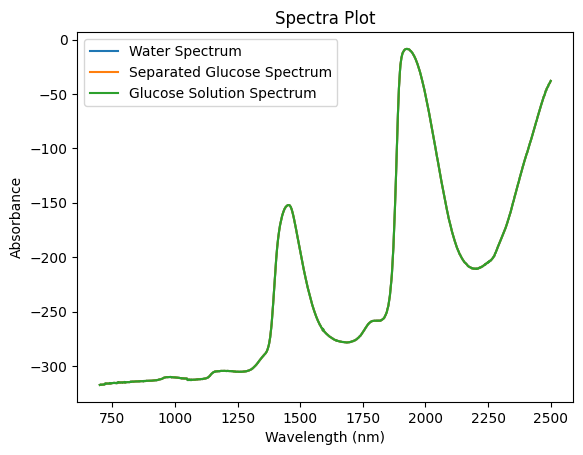

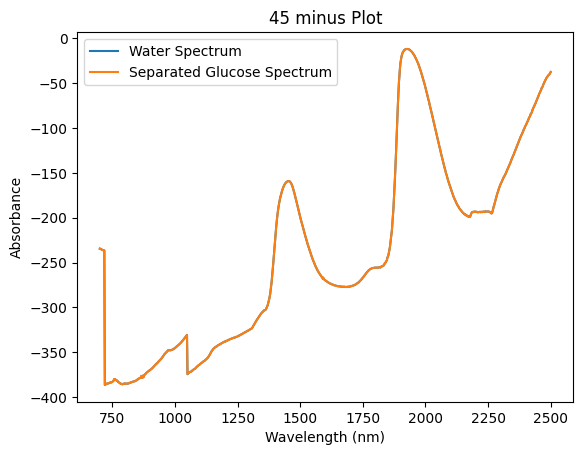

In [7]:
# Example usage
spectrum_names = ['Water', '', 'Glucose Solution', ]
spectrum_45_names = ['Plus 45 Water','Plus 45 Glucose']

"""WAVELENGTHS ARE DEFINED AT THE TOP OF THE SCRIPT"""

labels = ['Water Spectrum', 'Separated Glucose Spectrum', 'Glucose Solution Spectrum']
title = 'Spectra Plot'
title_45 = '45 minus Plot'

"""REMEMBER, NO NORMALIZATON!!!"""

spectra.plot_spectra(spectrum_names, wavelengths, labels, title, transform=True)
spectraPlus45.plot_spectra(spectrum_45_names, wavelengths, labels, title_45, transform=True)
